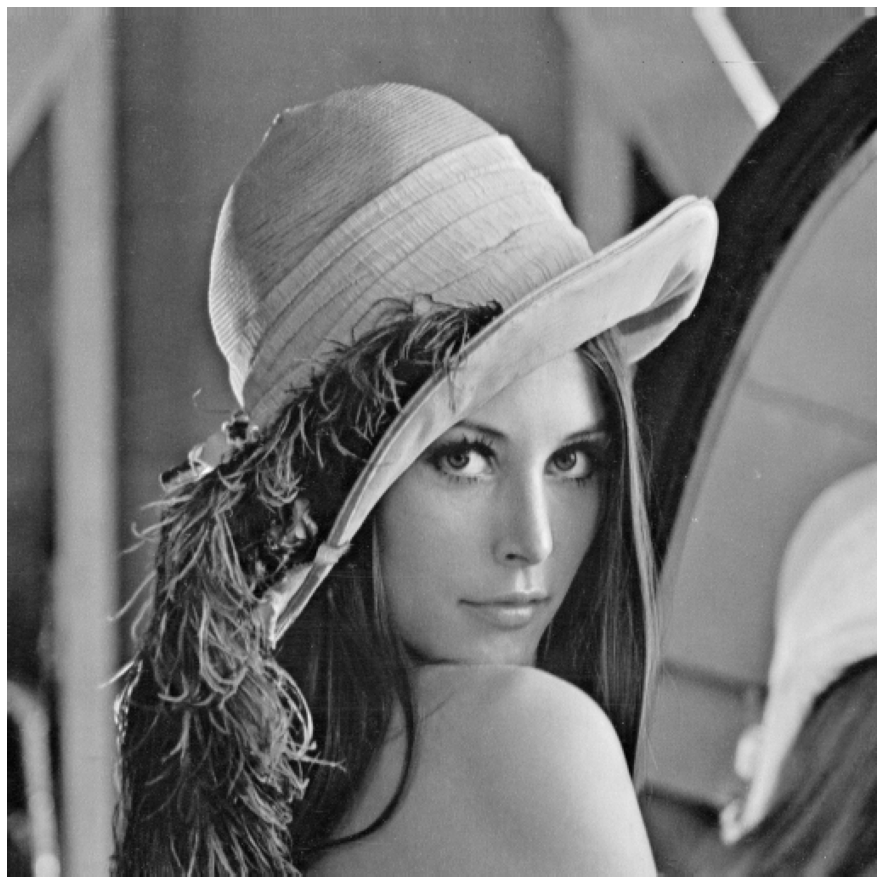

In [16]:
import numpy as np
import pywt
import pywt.data
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math
img = mpimg.imread('Lenna.jpg')
img = np.mean(img,-1)#zamiana na obraz czarnobiały
plt.axis('off')
plt.imshow(img, cmap=plt.get_cmap("gray"))
plt.imsave('lenaoriginal'+'.png',img.astype('uint8'),cmap = 'gray')

In [9]:
#nazwa użytej falki
wname = 'db1'
#poziom dekompozyji
n = 9 
#tryb (zalecany 'periodization' dla każdego z obrazów)

#przetworzony obraz zostaje przechowany w formie listy gdzie elementy oznaczają następująco
#0 -> (array) warstwa przybliżająca danego poziomu falki
#1 -> (tuple3 of arrays) warstwa detali dla ostatniego poziomu dekompozycji 
C = pywt.wavedec2(img,wavelet=wname,level=n,mode='periodization',axes=(-2,-1))

# oryginał obrazu uzyskany za pomocą odwrócenia operacji dekompozycji falkowej
imgr = pywt.waverec2(C,wavelet=wname,mode='periodization',axes=(-2,-1))
imgr = np.uint(imgr)

#Normalizacja wyników
C[0] /= np.abs(C[0]).max()
for detail_level in range(n):
    C[detail_level + 1] = [d/np.abs(d).max() for d in C[detail_level + 1]]
#uzyskanie każdej z warstwy dekompozycji obrazu
#warstwa przybliżenia poziom 2
cA2 = C[0]
#warstwa detali (horizontal,vertical,diagonal)
#poziom 1
(cH1,cV1,cD1) = C[-1]
#poziom 2
(cH2,cV2,cD2) = C[-2]

arr, coeff_slices = pywt.coeffs_to_array(C)

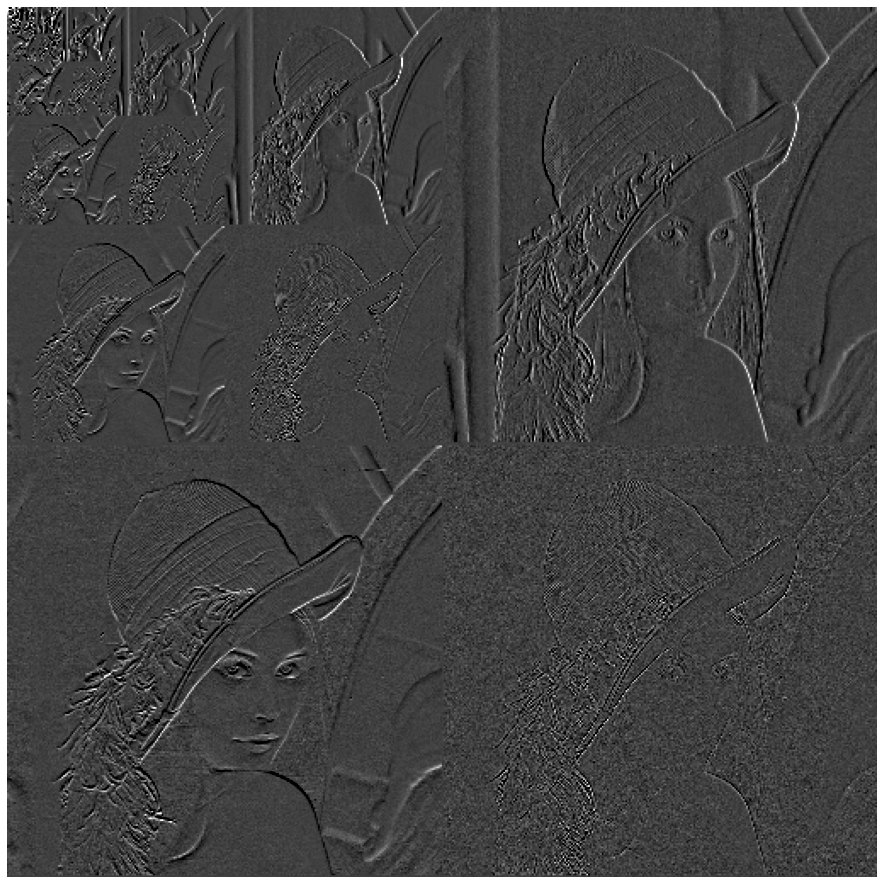

In [10]:
#prezentacja rezulatatów
plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.axis('off')
plt.show()

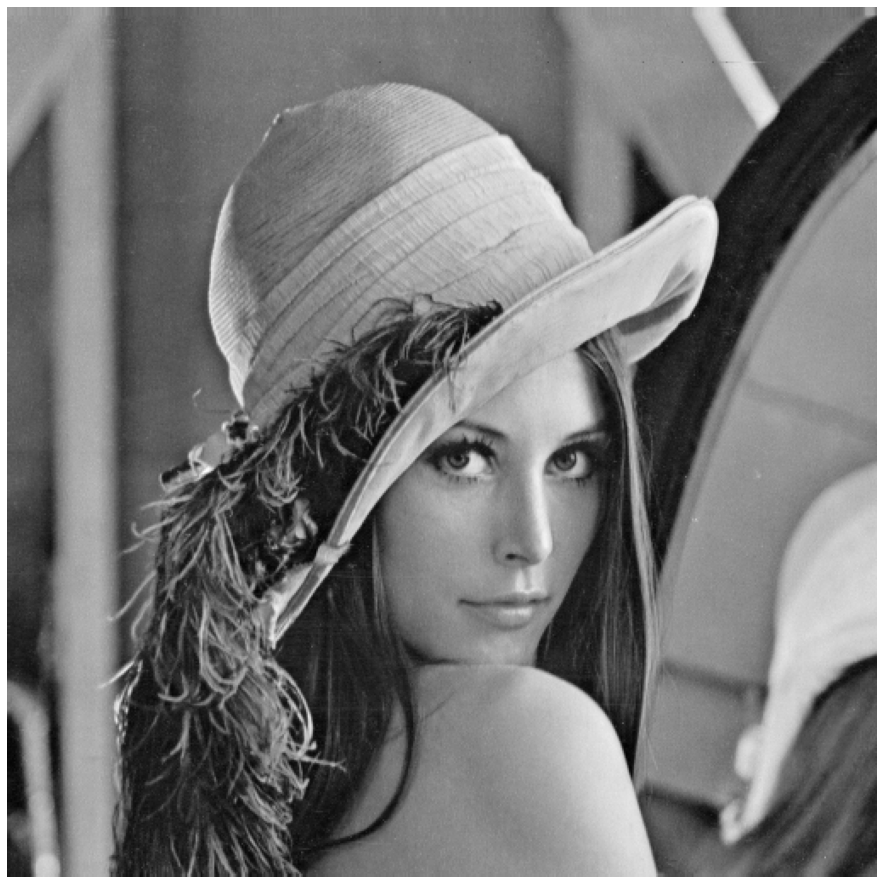

In [11]:
#wyniki odwrócenia operacji falki
plt.axis('off')
plt.imshow(imgr, cmap=plt.get_cmap("gray"))

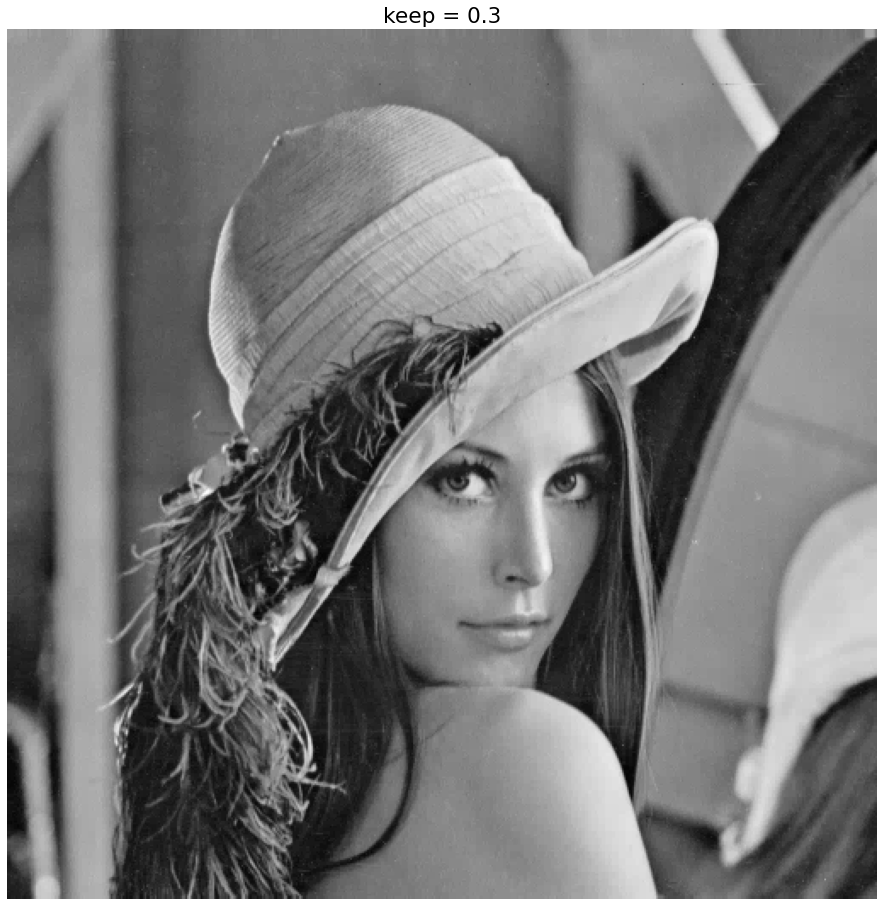

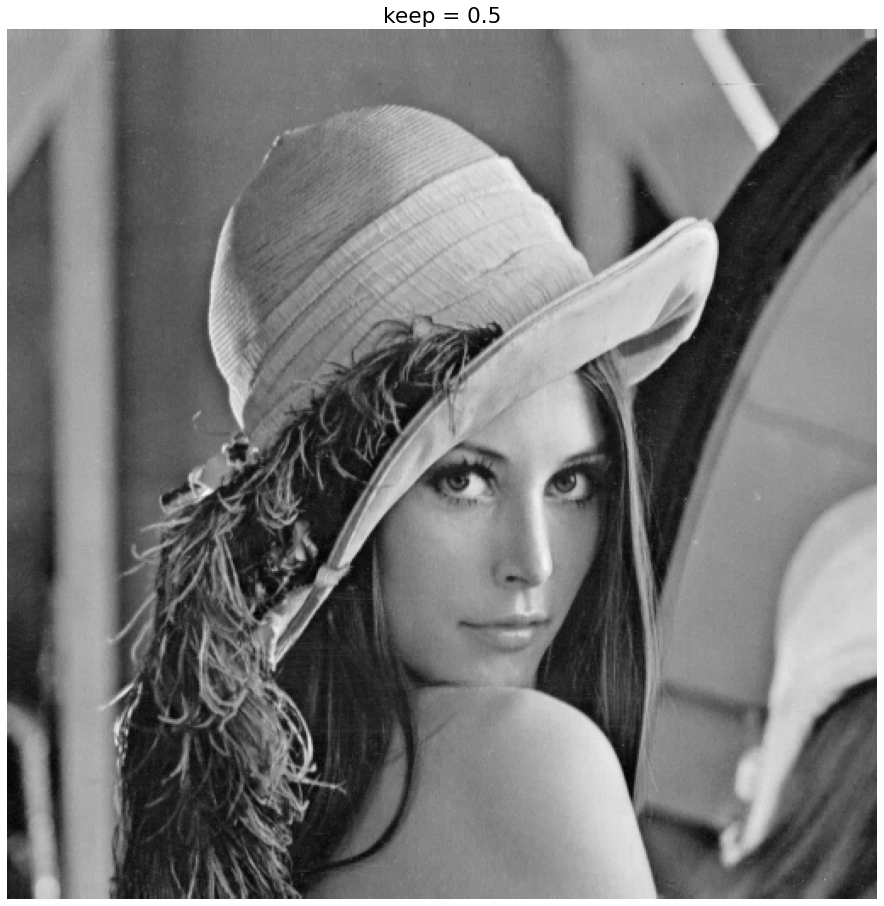

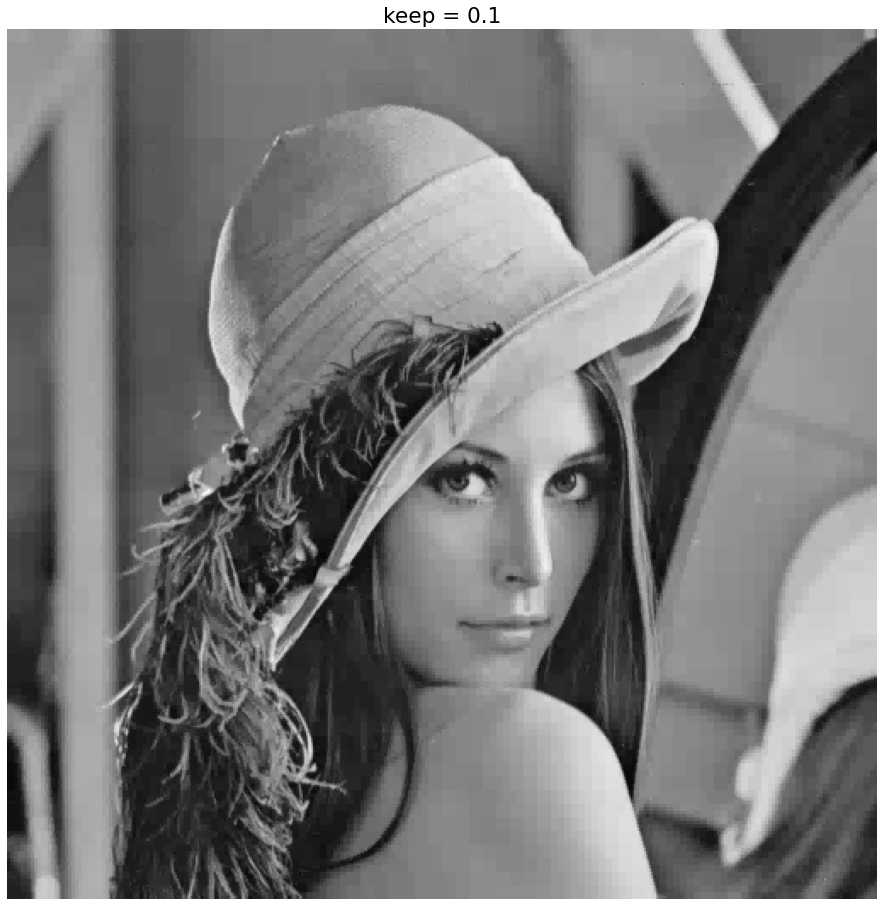

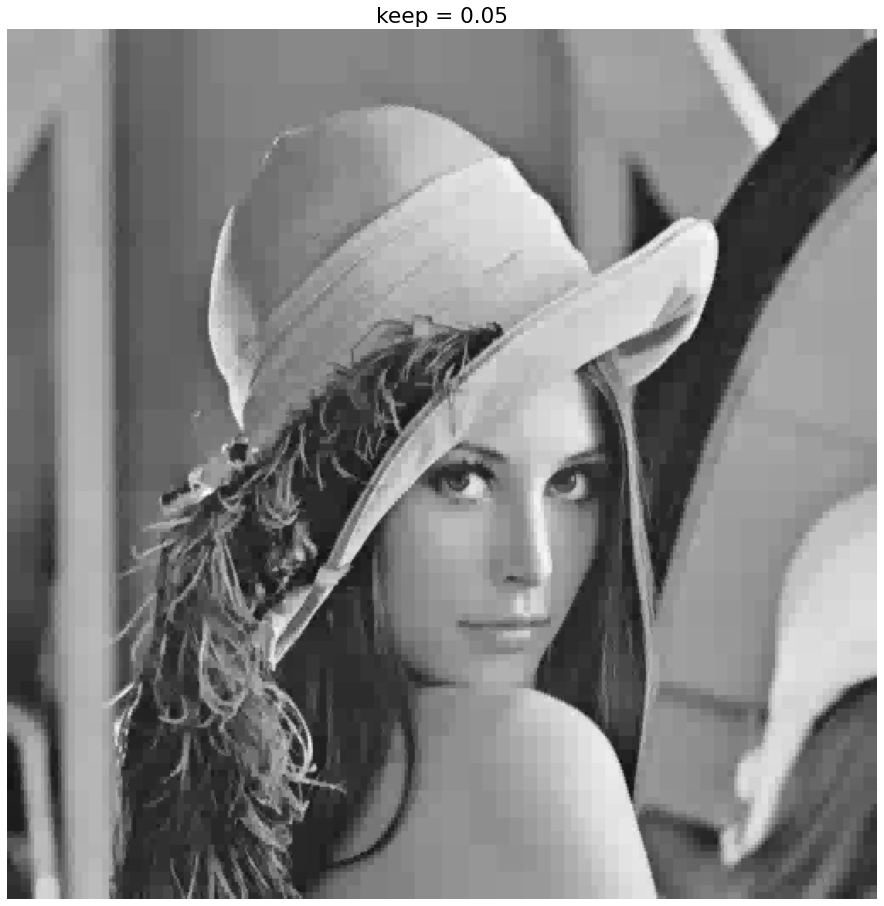

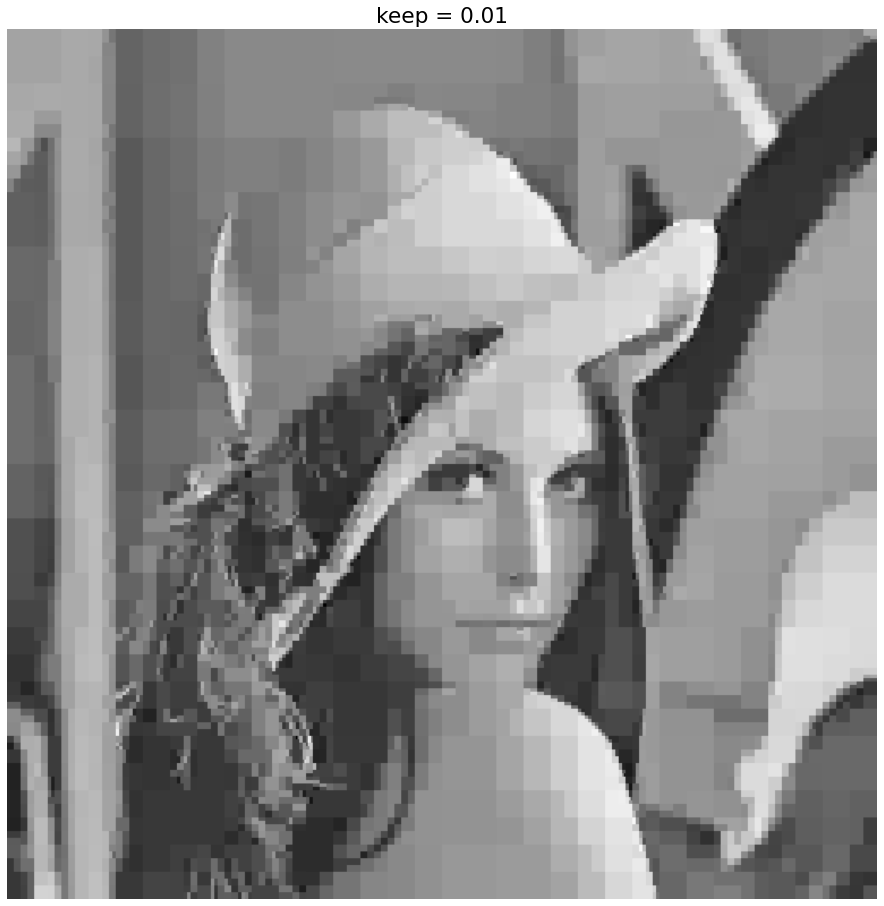

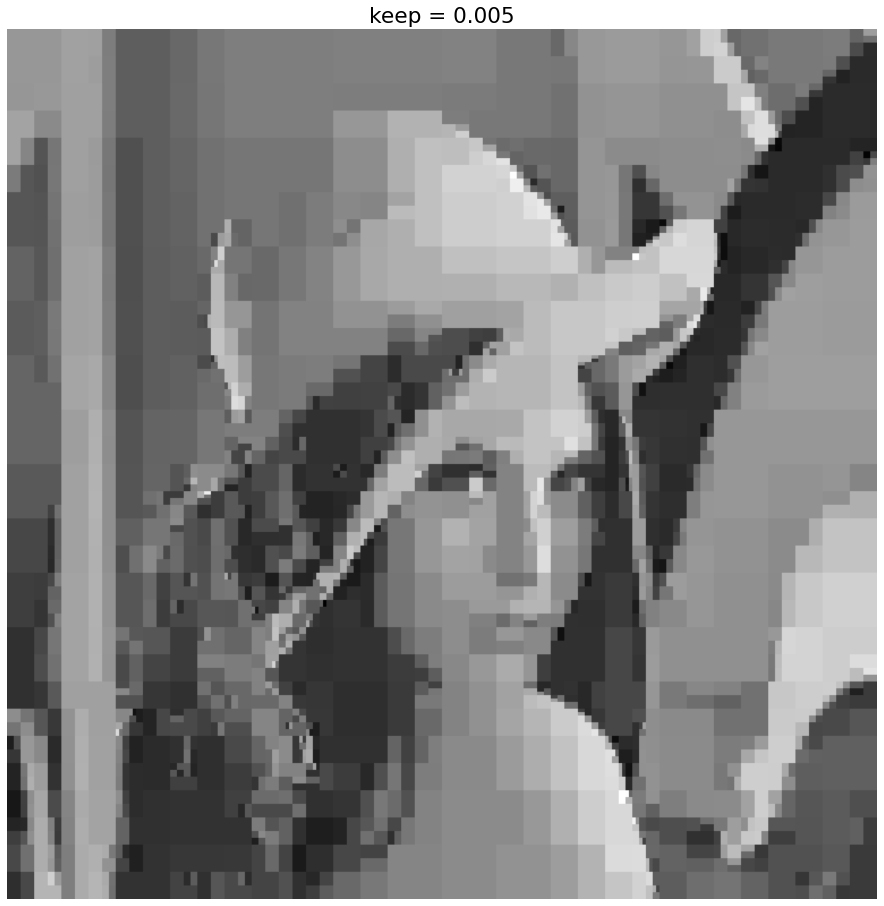

In [12]:
coeffs = pywt.wavedec2(img,wavelet=wname,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.3,0.5,0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=wname)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))
    plt.imsave('lenacompressed'+str(keep)+'.png',Arecon.astype('uint8'),cmap = 'gray')

(512, 512)


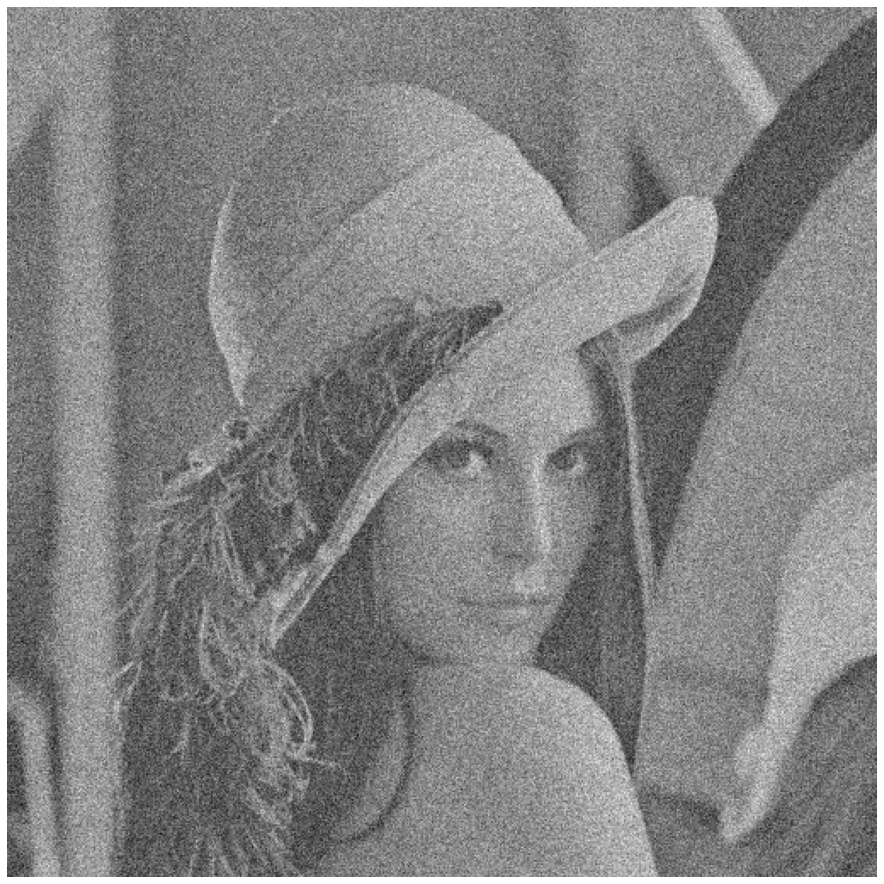

In [31]:
noiseSigma = 16.0
levels = (np.floor(np.log2(img.shape[0]))).astype(int)
img += np.random.normal(0, noiseSigma, size=img.shape)
print(img.shape)
plt.axis('off')
plt.imshow(img, cmap=plt.get_cmap("gray"))


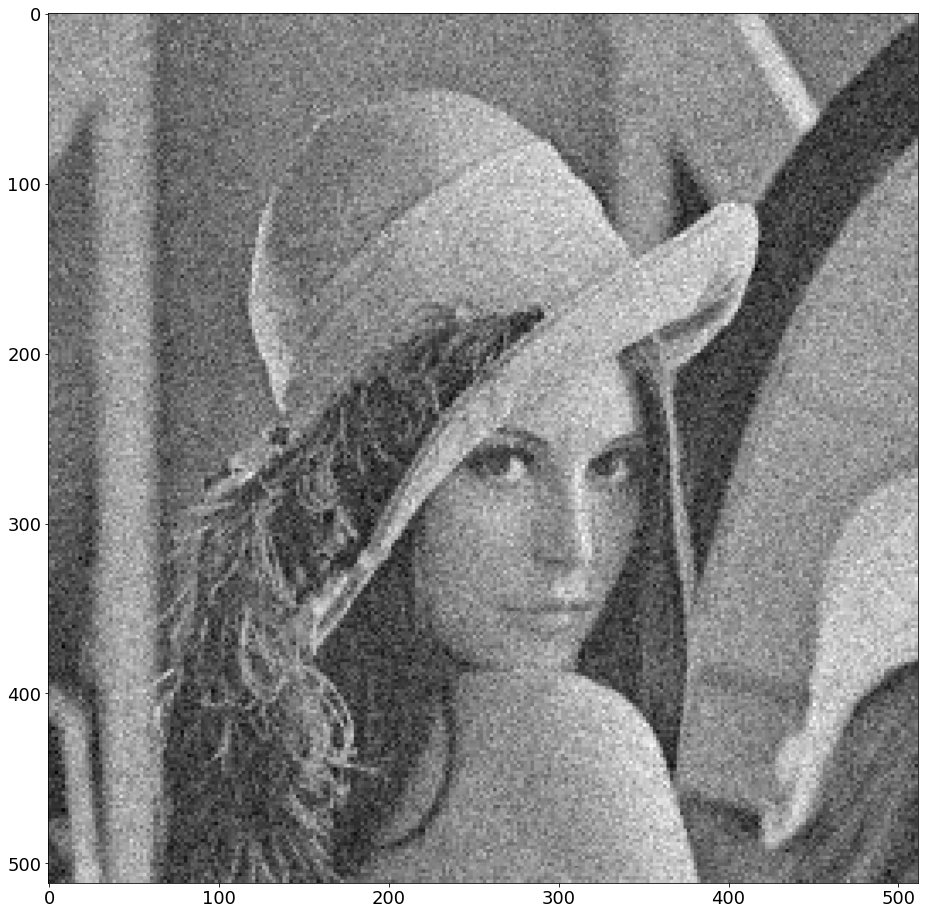

In [48]:
WaveletCoeffs = pywt.wavedec2( img, wavelet=wname, level=1)
threshold = noiseSigma*np.sqrt(2*np.log2(img.size))
#denoised_coeffs = WaveletCoeffs[:]
cA = WaveletCoeffs[0]
#warstwa detali (horizontal,vertical,diagonal)
#poziom 1
tupleDetails = WaveletCoeffs[1]
c0,c1,c2 = tupleDetails
c0 = pywt.threshold(c0,threshold,mode = 'soft')
c1 = pywt.threshold(c1,threshold,mode = 'soft')
c2 = pywt.threshold(c2,threshold,mode = 'soft')
denoised_tupleDetails = (c0,c1,c2)

#WaveletCoeffs = cA2,tupleDetails
denoised_coeffs = []
denoised_coeffs.append(cA2)
denoised_coeffs.append(denoised_tupleDetails)

#WaveletCoeffs[1:] = (pywt.threshold(i,threshold,mode='soft') for i in WaveletCoeffs[1:])
NewImage = pywt.waverec2( denoised_coeffs, wavelet=wname)
#NewImage = pywt.waverec2( WaveletCoeffs, wavelet=wname)

plt.imshow(NewImage, cmap=plt.get_cmap("gray"))